In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn import datasets, tree

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
featuresData = pd.read_csv('../dataset/feature_regression_example.csv')

In [3]:
featuresData = featuresData[featuresData.YEARWEEK < 201653]

In [4]:
featuresData["HO_YN"] = np.where(featuresData["HOLIDAY"] == "Y", 1, 0)

In [5]:
featuresData["PRO_YN"] = np.where(featuresData["PROMOTION"] == "Y", 1, 0)

In [6]:
corrDF = featuresData.corr()

In [7]:
corrResult = corrDF.reset_index()

In [8]:
featuresStd = 0.5

In [9]:
features = corrResult[ (corrResult.QTY != 1) & (abs(corrResult.QTY) > featuresStd)]["index"].tolist()

In [10]:
label = ['QTY']

In [11]:
yearweekStd = 201630

In [12]:
trainingData_features = featuresData[featuresData.YEARWEEK <= yearweekStd][features]
trainingData_label = featuresData[featuresData.YEARWEEK <= yearweekStd][label]
testData_features = featuresData[featuresData.YEARWEEK > yearweekStd][features]
testData_label = featuresData[featuresData.YEARWEEK > yearweekStd]

trainingData_features2 = featuresData[featuresData.YEARWEEK <= yearweekStd][features]
trainingData_label2 = featuresData[featuresData.YEARWEEK <= yearweekStd][label]
testData_features2 = featuresData[featuresData.YEARWEEK > yearweekStd][features]
testData_label2 = featuresData[featuresData.YEARWEEK > yearweekStd]

### 여기부터 Linear = 2붙은게 Linear

In [13]:
model_method = tree.DecisionTreeRegressor()
model_method2 = LinearRegression()

In [14]:
model = model_method.fit(trainingData_features,trainingData_label)

In [15]:
model2 = model_method2.fit(trainingData_features2,trainingData_label2)

In [16]:
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [17]:
model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
predict = model.predict(testData_features)

In [19]:
predict2 = model2.predict(testData_features2)

In [20]:
predictData = pd.DataFrame(predict)

predictData.columns = ["PREDICT"]

testData_label = testData_label.reset_index(drop = True)

AnswerData = pd.concat([testData_label,predictData],axis = 1)

In [32]:
predictData2 = pd.DataFrame(predict2)

predictData2.columns = ["PREDICT2"]

testData_label2 = testData_label2.reset_index(drop = True)

AnswerData2 = pd.concat([testData_label2,predictData2],axis = 1)

In [22]:
import math

In [23]:
mean_absolute_error(AnswerData["QTY"],AnswerData["PREDICT"])

460.25259740259736

In [24]:
mean_absolute_error(AnswerData2["QTY"],AnswerData2["PREDICT2"])
#Linear

566.617239476098

In [25]:
math.sqrt(mean_squared_error(AnswerData["QTY"],AnswerData["PREDICT"]))

603.7396042425769

In [26]:
math.sqrt(mean_squared_error(AnswerData2["QTY"],AnswerData2["PREDICT2"]))
#Linear

722.6052639386677

In [27]:
r2_score(AnswerData["QTY"],AnswerData["PREDICT"])

0.21932322337186283

In [28]:
r2_score(AnswerData2["QTY"],AnswerData2["PREDICT2"])
#Linear

-0.11834080332946595

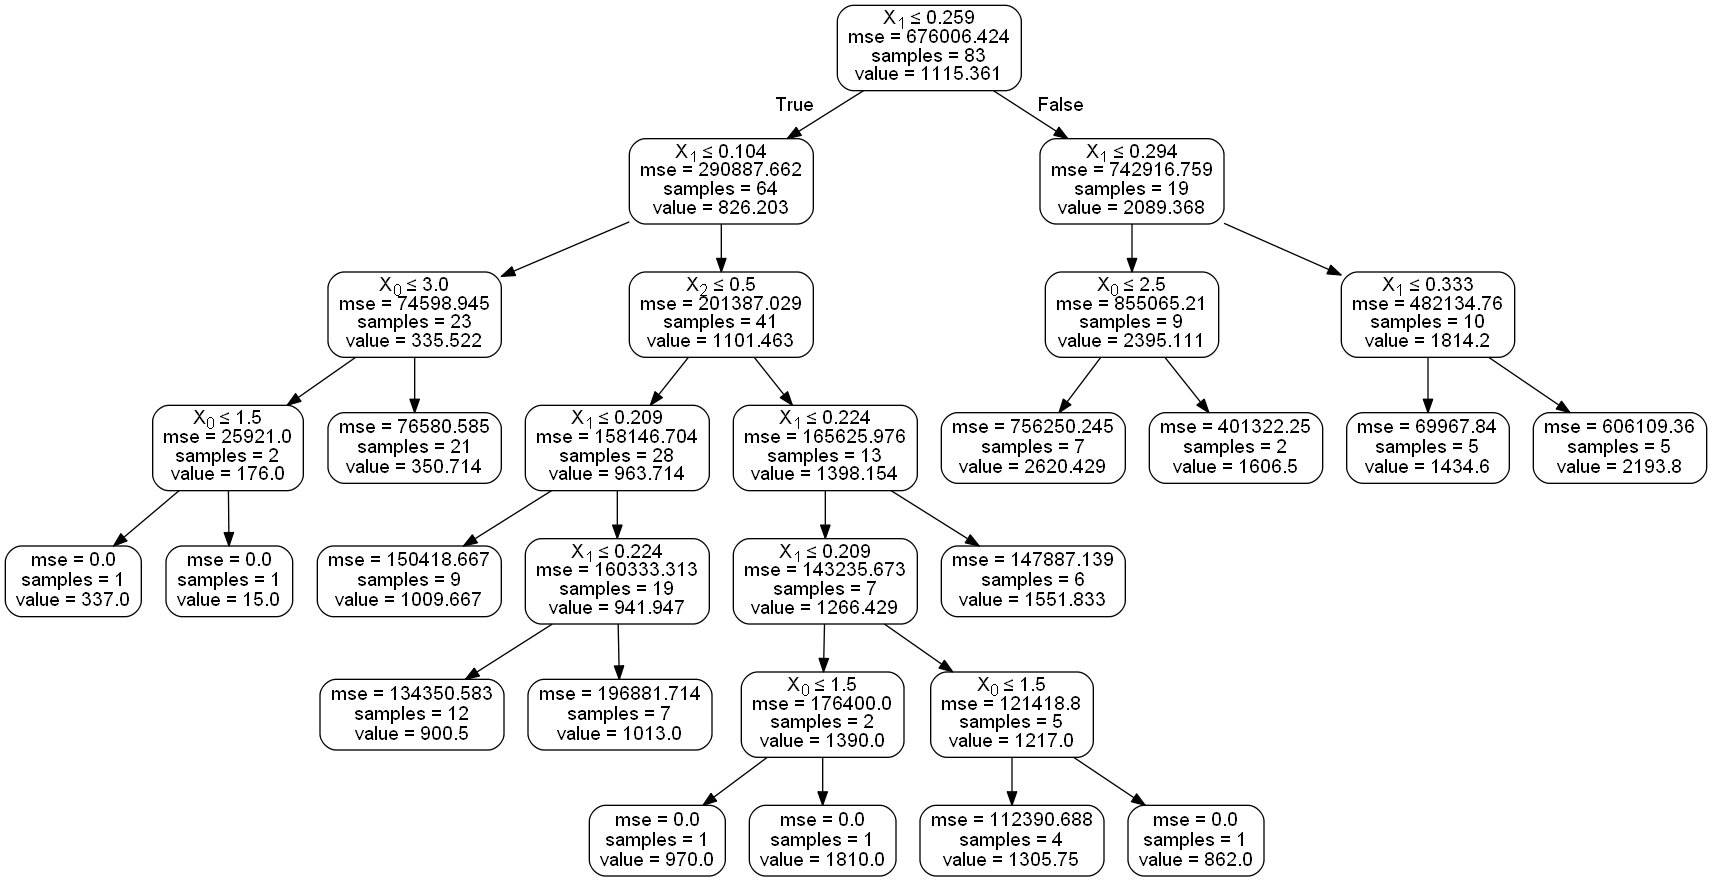

In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

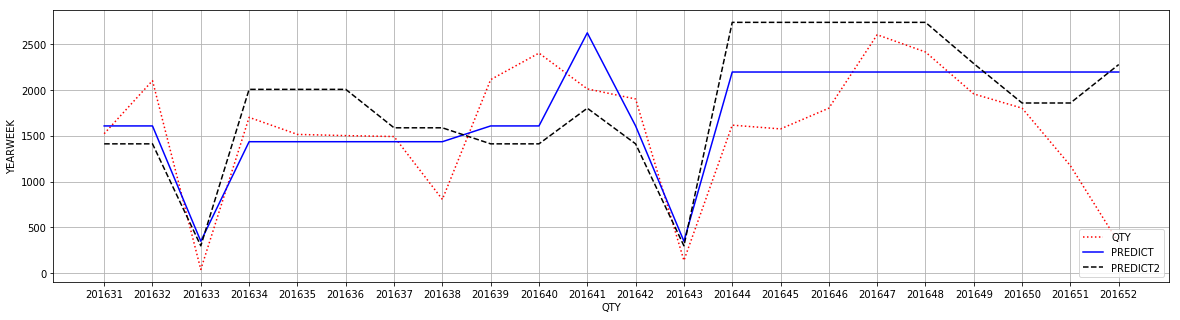

In [107]:
x = AnswerData2["YEARWEEK"].astype(str)
y = AnswerData2["QTY"]
y2 = AnswerData["PREDICT"]
y3 = AnswerData2["PREDICT2"]

fig = plt.figure(figsize=(20,5))

plt.plot(x,y,"r:", lw = 1.5 , label = "QTY")
plt.plot(x,y2,"b", label = "PREDICT")
plt.plot(x,y3,"k--", label = "PREDICT2")
plt.xlabel("QTY")
plt.ylabel("YEARWEEK")
plt.legend(loc=4)
plt.grid(True)
